In [2]:
import pandas as pd

# Load the dataset
file_path = 'Zoo.csv'
zoo_data= pd.read_csv(file_path)

In [3]:
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<ipython-input-6-4e9afea2a4b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=zoo_data, palette='viridis')


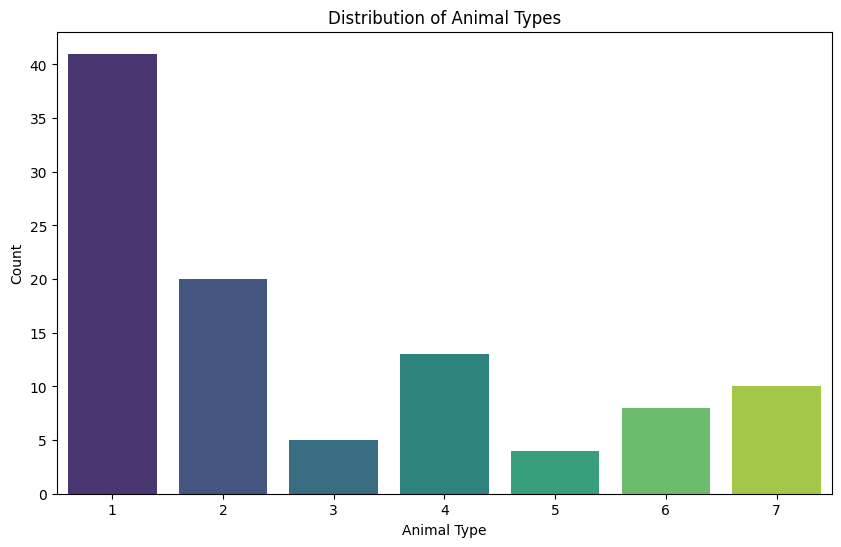

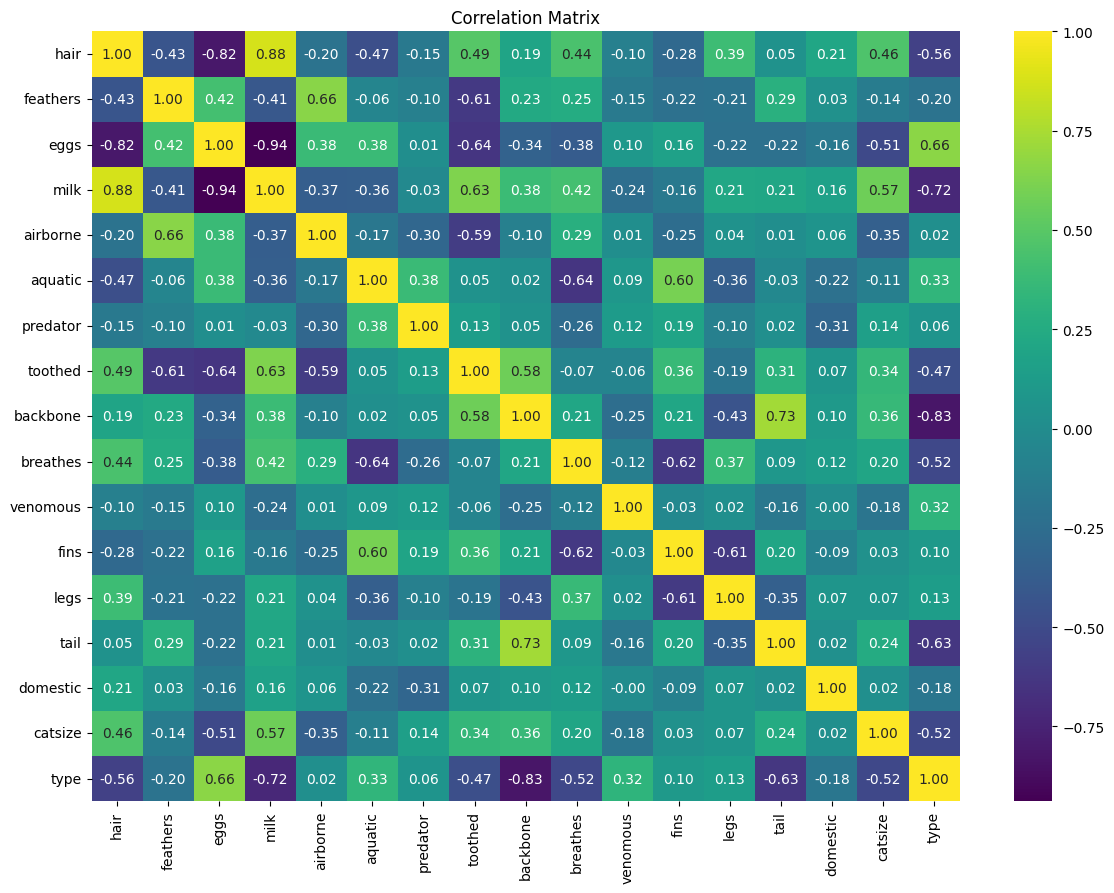

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'type' column (target variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=zoo_data, palette='viridis')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# Visualize correlations between features
plt.figure(figsize=(14, 10))
correlation_matrix = zoo_data.drop(columns=['animal name']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'animal name' column as it is not useful for classification
data = zoo_data.drop(columns=['animal name'])

# Define features and target
X = data.drop(columns=['type'])
y = data['type']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Displaying first 5 rows of the scaled data for verification

(array([[-0.77459667, -0.53881591,  0.7540739 , -0.7540739 , -0.53881591,
          1.32612997, -1.07803625,  0.85972695,  0.46056619,  0.51946248,
         -0.22941573, -0.46056619,  0.58629689, -1.67616342, -0.3992747 ,
         -0.83793058],
        [-0.77459667, -0.53881591,  0.7540739 , -0.7540739 , -0.53881591,
          1.32612997,  0.92761259,  0.85972695,  0.46056619,  0.51946248,
          4.35889894, -0.46056619,  0.58629689, -1.67616342, -0.3992747 ,
         -0.83793058],
        [-0.77459667, -0.53881591,  0.7540739 , -0.7540739 ,  1.85592145,
         -0.7540739 ,  0.92761259, -1.16316   , -2.17124059,  0.51946248,
         -0.22941573, -0.46056619,  1.5737443 , -1.67616342, -0.3992747 ,
         -0.83793058],
        [ 1.29099445, -0.53881591, -1.32612997,  1.32612997, -0.53881591,
         -0.7540739 , -1.07803625,  0.85972695,  0.46056619,  0.51946248,
         -0.22941573, -0.46056619,  0.58629689,  0.59660054,  2.50454133,
          1.19341628],
        [-0.77459667

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [9]:
# Range of K values to test
k_range = range(1, 31)
k_scores = []

In [10]:
# Perform cross-validation to find the best value of K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

In [11]:
# Find the best value for K
best_k = k_range[np.argmax(k_scores)]
best_k, max(k_scores)

(1, 0.9375)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the KNN classifier with K=5 (example)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test_scaled)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1 Score: 0.93

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [15]:
# Reduce the dataset to two features for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [16]:
# Train KNN on the reduced dataset
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [17]:
# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [18]:
# Predict the results on the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

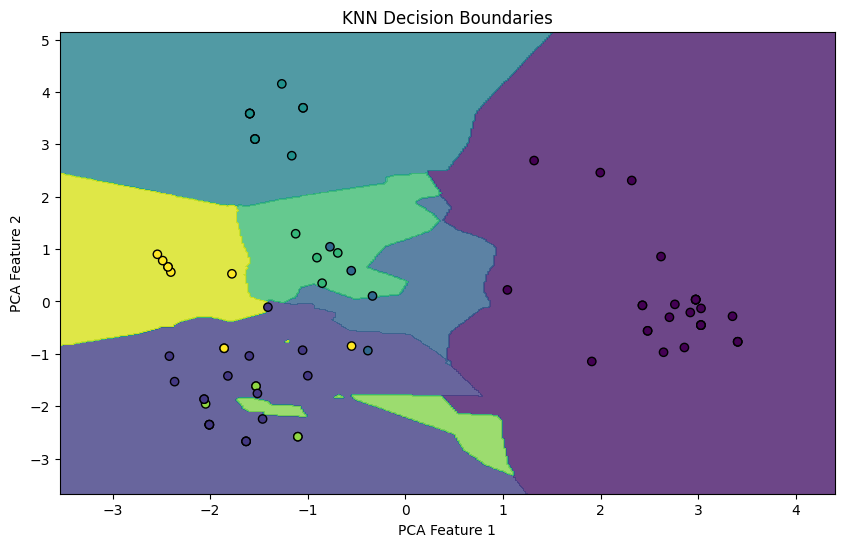

In [19]:
# Plotting decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.viridis)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()


**1. What are the key hyperparameters in KNN?**


**Key Hyperparameters in KNN**

**Number of Neighbors (K)**: This is the number of nearest neighbors to consider when making a prediction. The choice of
𝐾
K can significantly affect the performance of the classifier. A smaller
𝐾
K can make the model more sensitive to noise, while a larger
𝐾
K can smooth out predictions but might miss local patterns.

**Distance Metric:** This determines how the distance between data points is measured. The choice of distance metric can affect the performance of the KNN algorithm. Common distance metrics include Euclidean, Manhattan, and Minkowski.

**Weights:** This determines how the distance of the neighbors influences the classification. The common options are:

uniform: All points in each neighborhood are weighted equally.

distance: Closer neighbors of a query point have a greater influence than neighbors that are further away.

**Algorithm:** This determines the algorithm used to compute the nearest neighbors. Options include:

auto: Let the algorithm decide based on the values passed to fit method.

ball_tree: Use the BallTree algorithm.

kd_tree: Use the KDTree algorithm.

brute: Use a brute-force search.

**Leaf Size:** This is relevant when using the BallTree or KDTree algorithms and affects the speed of the construction and query times of these trees.

**p (Power Parameter for the Minkowski Metric):** When using the Minkowski distance metric, this parameter determines the power parameter
𝑝
p. For
𝑝
=
1
p=1, Minkowski distance is equivalent to the Manhattan distance, and for
𝑝
=
2
p=2, it is equivalent to the Euclidean distance.

**2. What distance metrics can be used in KNN?**

**Distance Metrics in KNN**

**Euclidean Distance:** The most common distance metric, which is the straight-line distance between two points in Euclidean space.

𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d(x,y)=
i=1
∑
n
​
 (x
i
​
 −y
i
​
 )
2

​

**Manhattan Distance (L1 norm):** The sum of the absolute differences of their Cartesian coordinates.

𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)=
i=1
∑
n
​
 ∣x
i
​
 −y
i
​
 ∣


**Minkowski Distance:** A generalized form of Euclidean and Manhattan distances. It uses a parameter
𝑝
p which can be adjusted.

𝑑
(
𝑥
,
𝑦
)
=
(
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
𝑝
)
1
/
𝑝
d(x,y)=(
i=1
∑
n
​
 ∣x
i
​
 −y
i
​
 ∣
p
 )
1/p

For
𝑝
=
1
p=1, it is equivalent to the Manhattan distance.
For
𝑝
=
2
p=2, it is equivalent to the Euclidean distance.


**Chebyshev Distance:** The maximum absolute difference across one dimension.

𝑑
(
𝑥
,
𝑦
)
=
max
⁡
𝑖
(
∣
𝑥
𝑖
−
𝑦
𝑖
∣
)
d(x,y)=
i
max
​
 (∣x
i
​
 −y
i
​
 ∣)


**Cosine Similarity:** Measures the cosine of the angle between two vectors, which is a measure of orientation and not magnitude.

cosine similarity
=
𝑥
⋅
𝑦
∣
∣
𝑥
∣
∣
⋅
∣
∣
𝑦
∣
∣
cosine similarity=
∣∣x∣∣⋅∣∣y∣∣
x⋅y
​

Note: This is not a distance metric, but its complement (1 - cosine similarity) can be used as a distance metric.

**Hamming Distance:** Used for categorical variables and measures the number of positions at which the corresponding elements are different.

These hyperparameters and distance metrics allow for flexibility in the KNN algorithm to suit different types of data and problem requirements.